In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier_selector import Classifier_selector
from sbs import SequentialBackwardSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpa import mpa
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [2]:
''' Testing phase '''

' Testing phase '

In [3]:
classifier_selecting = Classifier_selector()

In [4]:
ion_df = pd.read_csv("./Datasets/ionosphere.csv", header = None)
num_features = ion_df.shape[1] - 1  # Assuming the last column is the label
feature_names = [f'feature{i+1}' for i in range(num_features)] + ['label']
ion_df.columns = feature_names
dict1 = {'g':0,'b':1}
ion_df = ion_df.replace({'label':dict1})
ion_df['label'] = ion_df['label'].apply(pd.to_numeric, errors = 'coerce')

/tmp/ipykernel_206634/3423510681.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ion_df = ion_df.replace({'label':dict1})


In [5]:
ion_df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [6]:
train_df, test_df = train_test_split(ion_df, test_size = 0.2, random_state = 11)

X_train = train_df.drop("label", axis = 1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis = 1)
y_test = test_df["label"]

In [7]:
# Clean the data before scaling
def clean_numeric_data(X):
    # Convert to DataFrame if not already
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X

    # Fix malformed numbers and convert to float
    for col in X.columns:
        X[col] = X[col].apply(lambda x: str(x).split('.')[0] + '.' + str(x).split('.')[1]
                             if isinstance(x, str) and x.count('.') > 1
                             else x).astype(float)
    return X

X_train = clean_numeric_data(X_train)
X_test = clean_numeric_data(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/soulangel443/.local/share/mise/installs/python/latest/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Best Cross-validation Score: 0.822963591229845

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        45
           1       0.95      0.73      0.83        26

    accuracy                           0.89        71
   macro avg       0.91      0.85      0.87        71
weighted avg       0.89      0.89      0.88        71



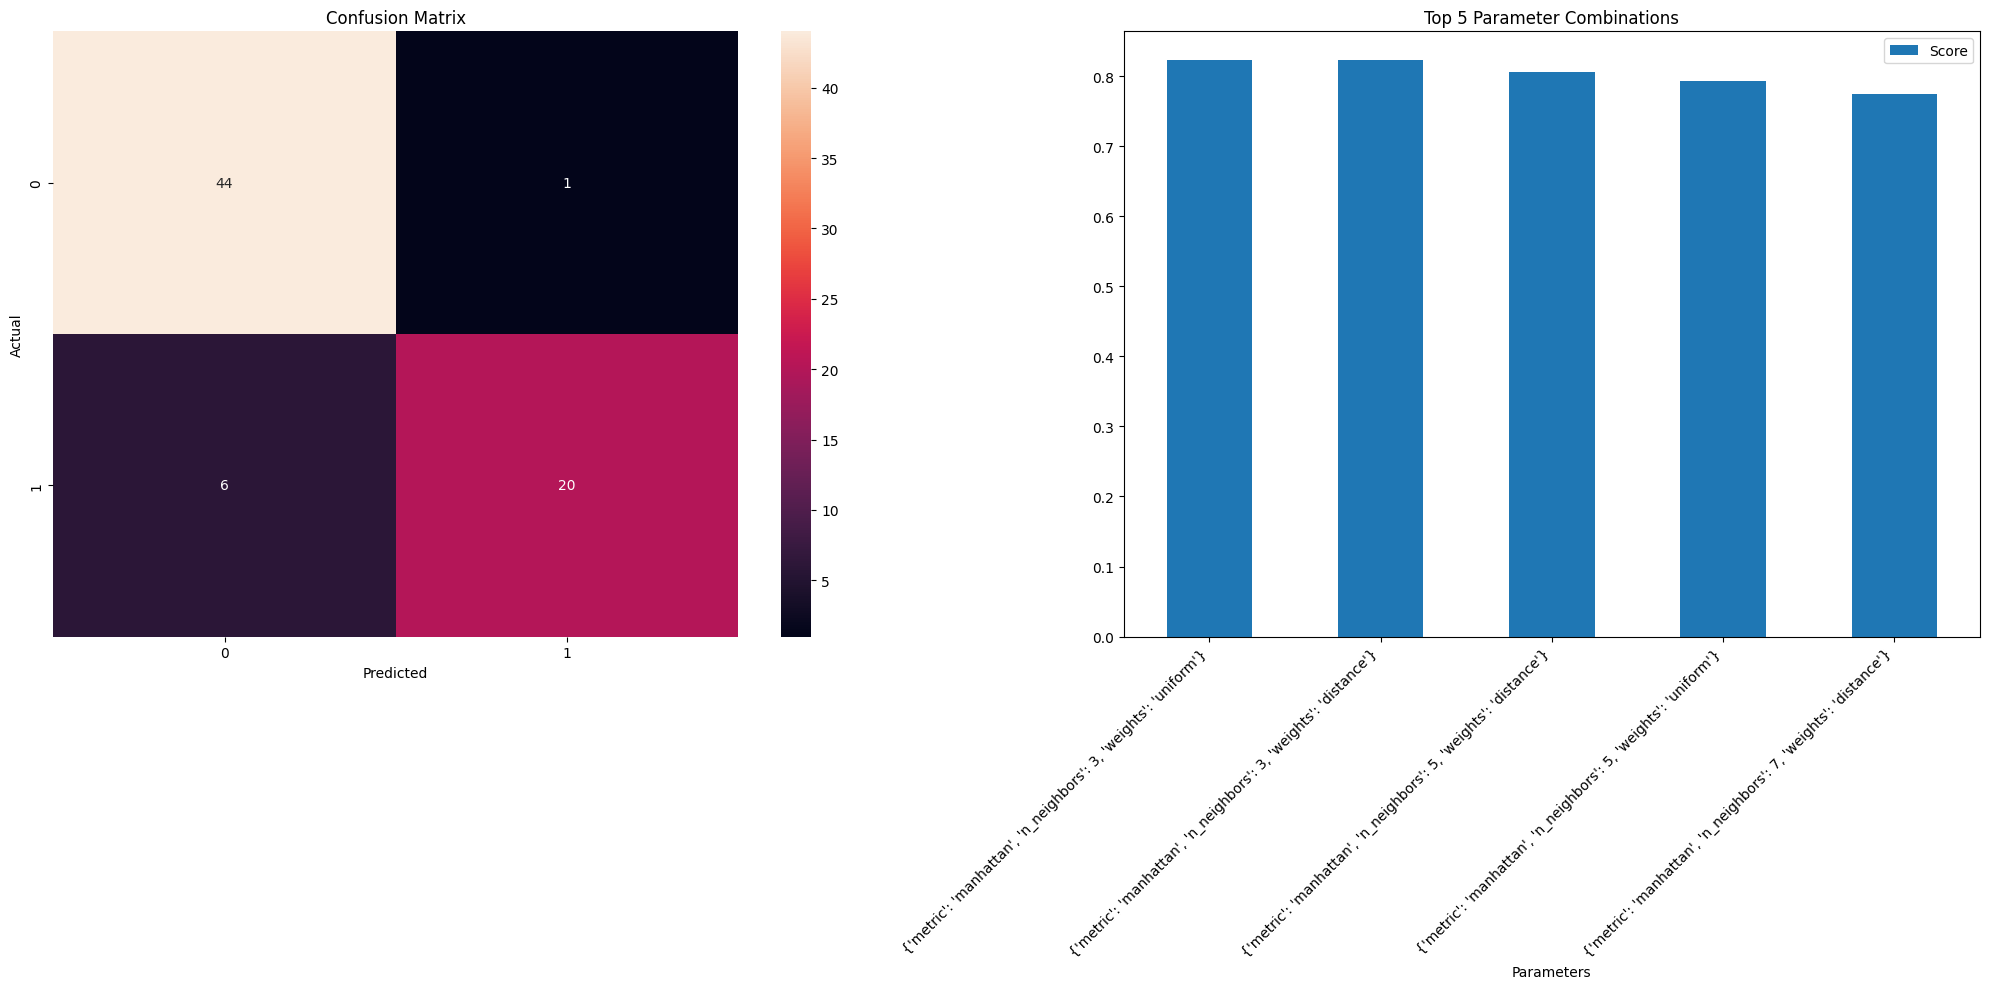

In [8]:
results_knn = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'knn')

print("\nBest Parameters:", results_knn['best_parameters'])
print("\nBest Cross-validation Score:", results_knn['best_score'])
print("\nFeature Importances:", results_knn['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_knn['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [9]:
knn = KNeighborsClassifier(**results_knn['best_parameters'])

sbs_knn = SequentialBackwardSelection(estimator=knn,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_knn.fit(X_train, X_test, y_train, y_test)


Removed feature: feature22
Current performance: 0.91549
Remaining features: ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature2
Current performance: 0.91549
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed featur

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'alpha': 0.01, 'eta0': 1.0, 'max_iter': 1000, 'penalty': 'elasticnet'}

Best Cross-validation Score: 0.8138438138438138

Feature Importances: {'feature1': np.float64(2.7757859271790934), 'feature2': np.float64(0.0), 'feature3': np.float64(0.0), 'feature4': np.float64(1.2175257285502932), 'feature5': np.float64(0.0), 'feature6': np.float64(0.0), 'feature7': np.float64(2.529930941905822), 'feature8': np.float64(0.2702092407025728), 'feature9': np.float64(0.0), 'feature10': np.float64(0.0), 'feature11': np.float64(0.0), 'feature12': np.float64(0.0), 'feature13': np.float64(0.0), 'feature14': np.float64(1.1315198199787235), 'feature15': np.float64(0.9296917138423194), 'feature16': np.float64(0.0), 'feature17': np.float64(1.5240125054923166), 'feature18': np.float64(0.0), 'feature19': np.float64(0.1870111552892006), 'feature20': np.float64(0.0), 'feature21': np.float64(2.3792217630113623), 'feature22': np.float

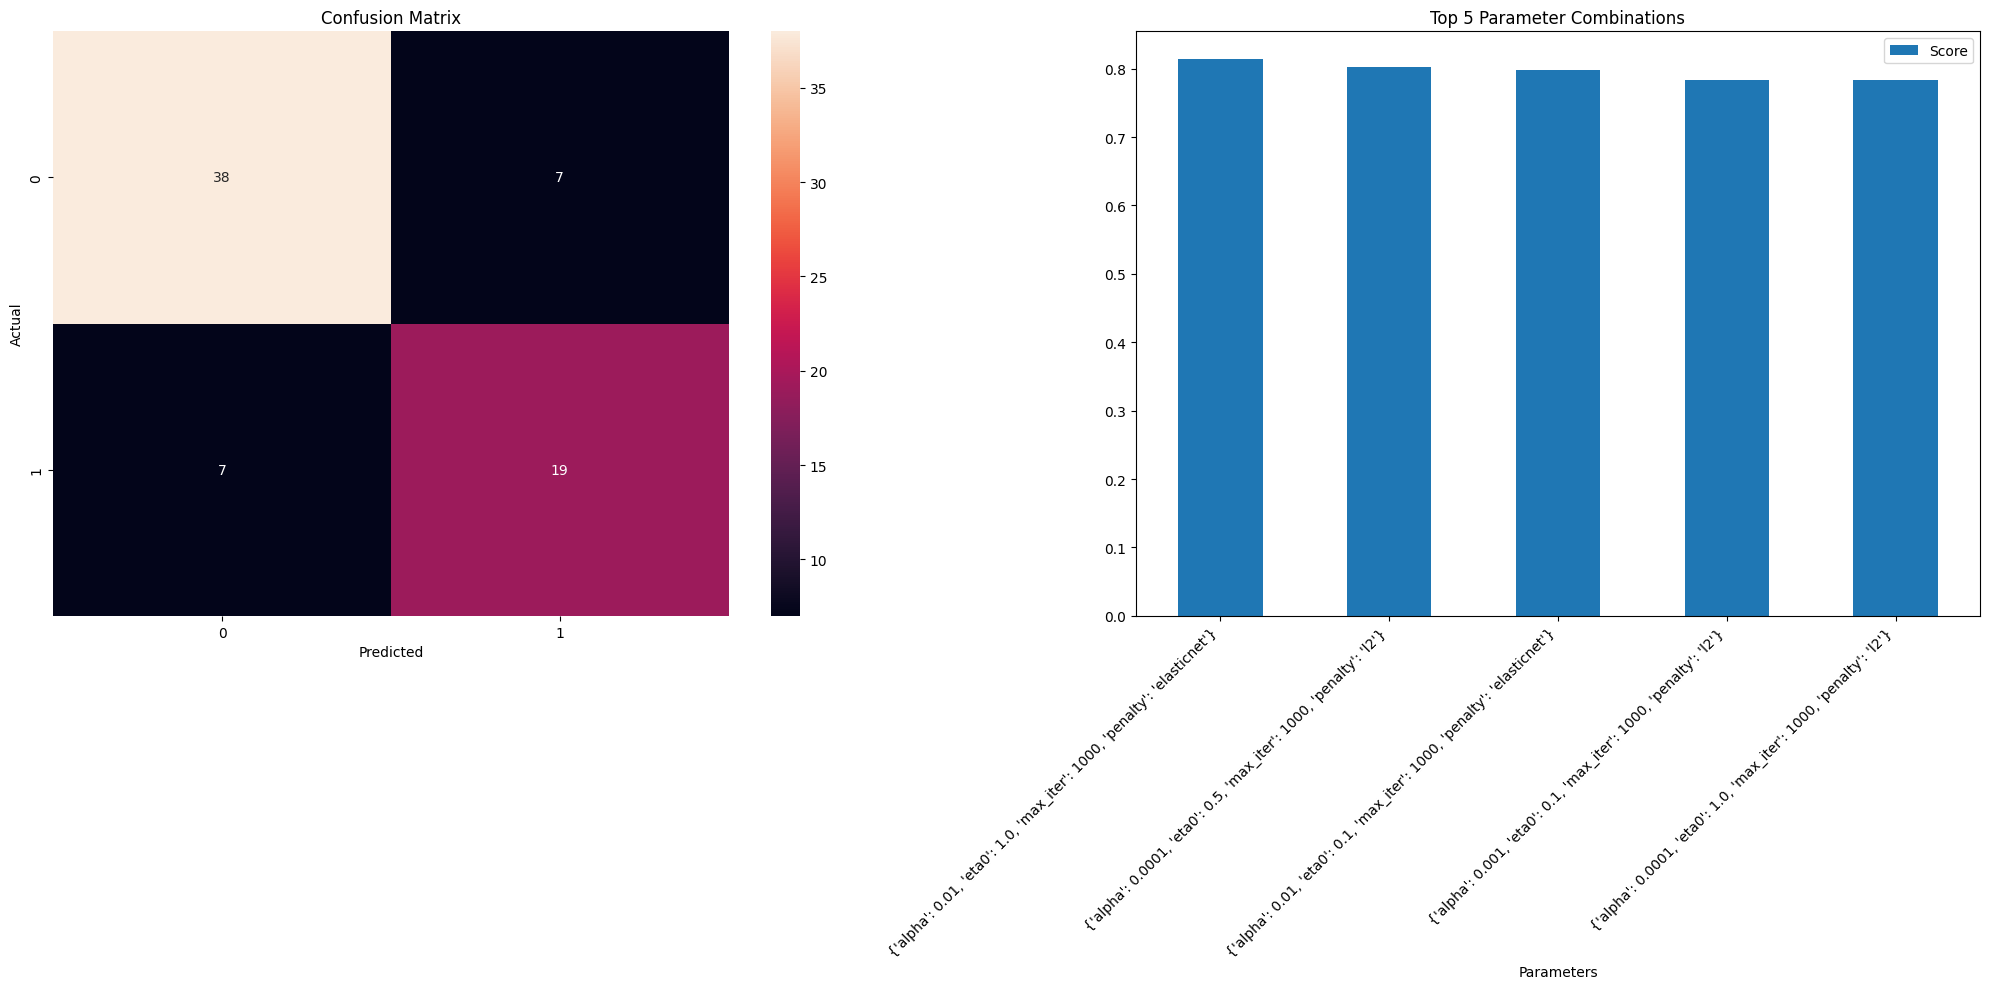

In [10]:
results_perceptron = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'perceptron')

print("\nBest Parameters:", results_perceptron['best_parameters'])
print("\nBest Cross-validation Score:", results_perceptron['best_score'])
print("\nFeature Importances:", results_perceptron['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_perceptron['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [11]:
perceptron = Perceptron(**results_perceptron['best_parameters'])

sbs_perceptron = SequentialBackwardSelection(estimator=perceptron,
                                             min_features = 3,
                                             scoring_metric=accuracy_score,
                                             scale_features=True,
                                             verbose=True)
sbs_perceptron.fit(X_train, X_test, y_train, y_test)


Removed feature: feature22
Current performance: 0.88732
Remaining features: ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature12
Current performance: 0.91549
Remaining features: ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed featur

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}

Best Cross-validation Score: 0.9151913046649888

Feature Importances: {'feature1': np.float64(0.025590953525558322), 'feature2': np.float64(0.0), 'feature3': np.float64(0.09648587249419913), 'feature4': np.float64(0.033014563812414105), 'feature5': np.float64(0.16431488422949744), 'feature6': np.float64(0.03738955060714294), 'feature7': np.float64(0.09603892646852781), 'feature8': np.float64(0.04131984662558812), 'feature9': np.float64(0.009288028648996662), 'feature10': np.float64(0.008798283304849684), 'feature11': np.float64(0.005598854471812305), 'feature12': np.float64(0.019999008369412777), 'feature13': np.float64(0.014605176294599058), 'feature14': np.float64(0.022825079410398828), 'feature15': np.float64(0.007864068055810185), 'feature16': np.float64(0.0215377507709186), 'feature17': np.float64(0.0097635029073335

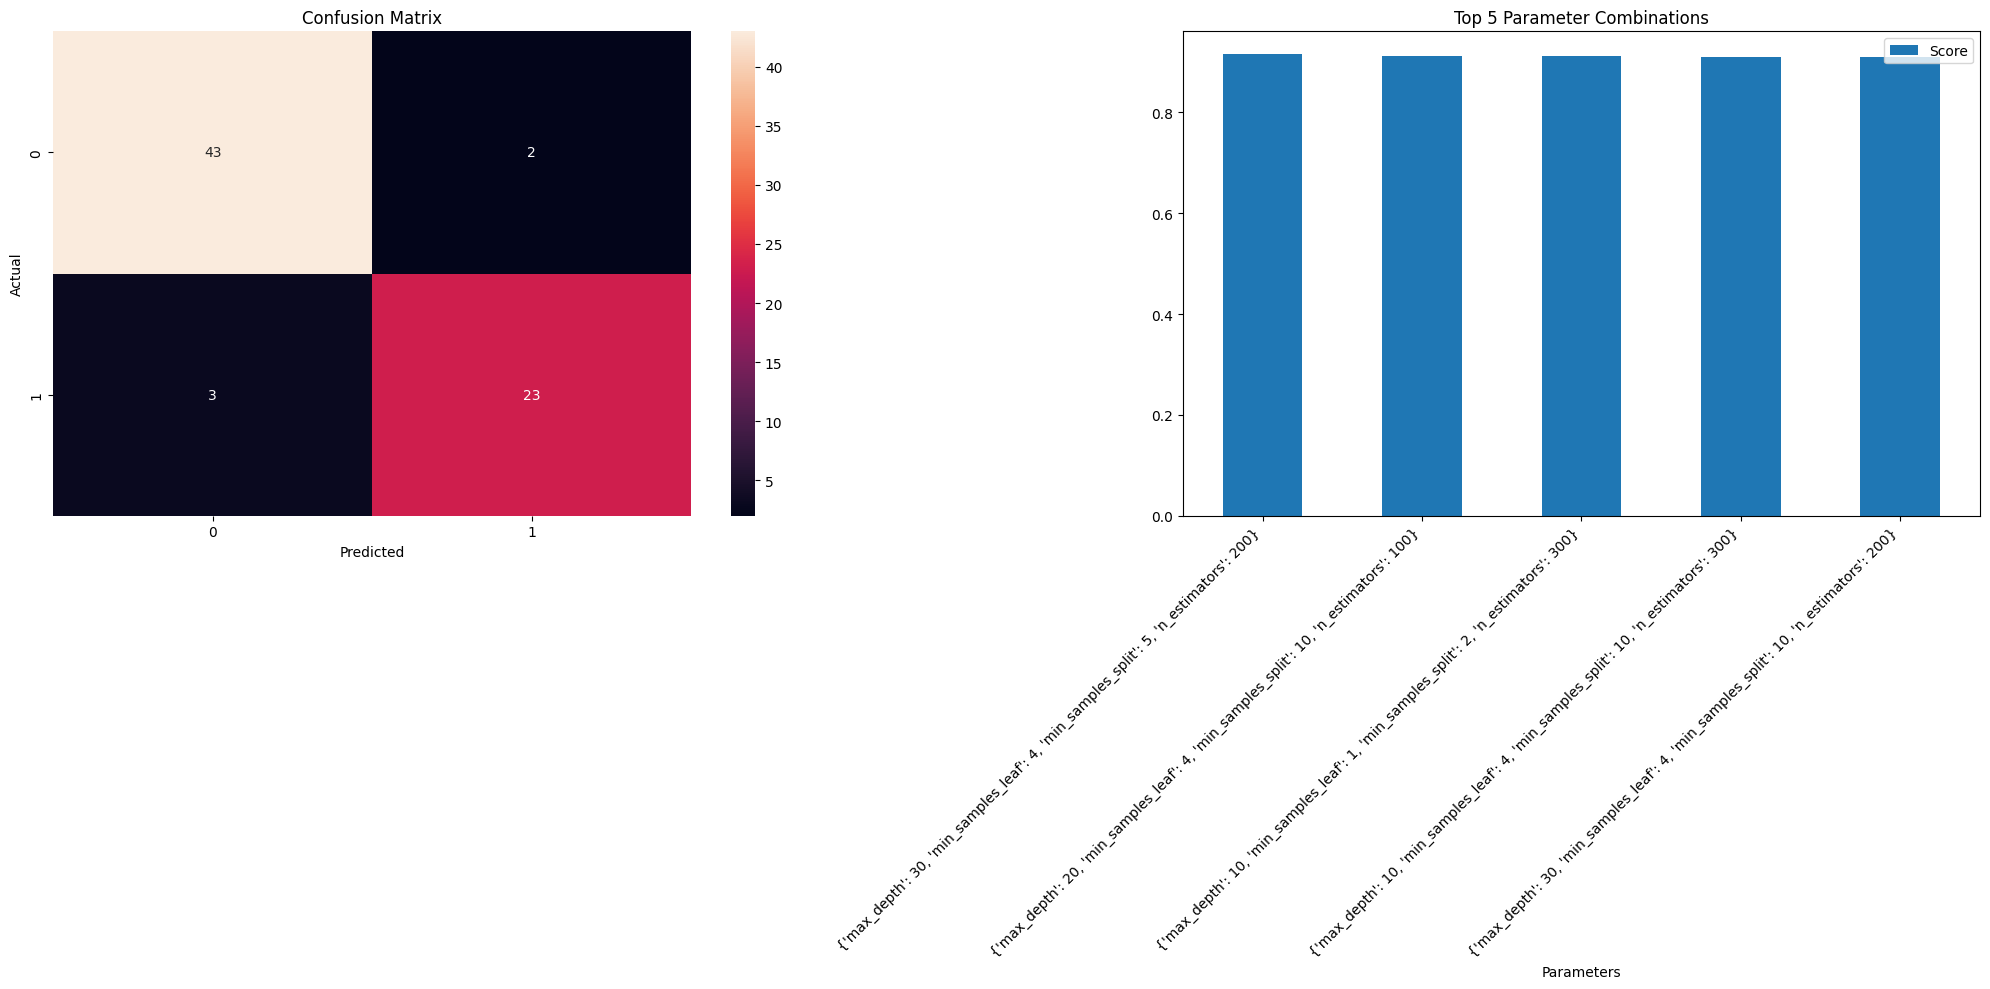

In [12]:
results_rf = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'rf')

print("\nBest Parameters:", results_rf['best_parameters'])
print("\nBest Cross-validation Score:", results_rf['best_score'])
print("\nFeature Importances:", results_rf['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_rf['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [13]:
rf = RandomForestClassifier(**results_rf['best_parameters'])

sbs_rf = SequentialBackwardSelection(estimator=rf,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_rf.fit(X_train, X_test, y_train, y_test)


Removed feature: feature2
Current performance: 0.94366
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature1
Current performance: 0.94366
Remaining features: ['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed featu

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best Cross-validation Score: 0.858802932487143

Feature Importances: {'feature1': np.float64(0.0), 'feature2': np.float64(0.0), 'feature3': np.float64(0.08132678090498296), 'feature4': np.float64(0.07365954029713345), 'feature5': np.float64(0.39312416314936116), 'feature6': np.float64(0.032335101414437), 'feature7': np.float64(0.03332638895691328), 'feature8': np.float64(0.0), 'feature9': np.float64(0.0), 'feature10': np.float64(0.0), 'feature11': np.float64(0.025300537640221325), 'feature12': np.float64(0.0), 'feature13': np.float64(0.0), 'feature14': np.float64(0.0), 'feature15': np.float64(0.0), 'feature16': np.float64(0.031427328506476365), 'feature17': np.float64(0.0), 'feature18': np.float64(0.004853763257641313), 'feature19': np.float64(0.018592854208917032), 'feature20': np.float64(0.0), 'feature21': np.float64

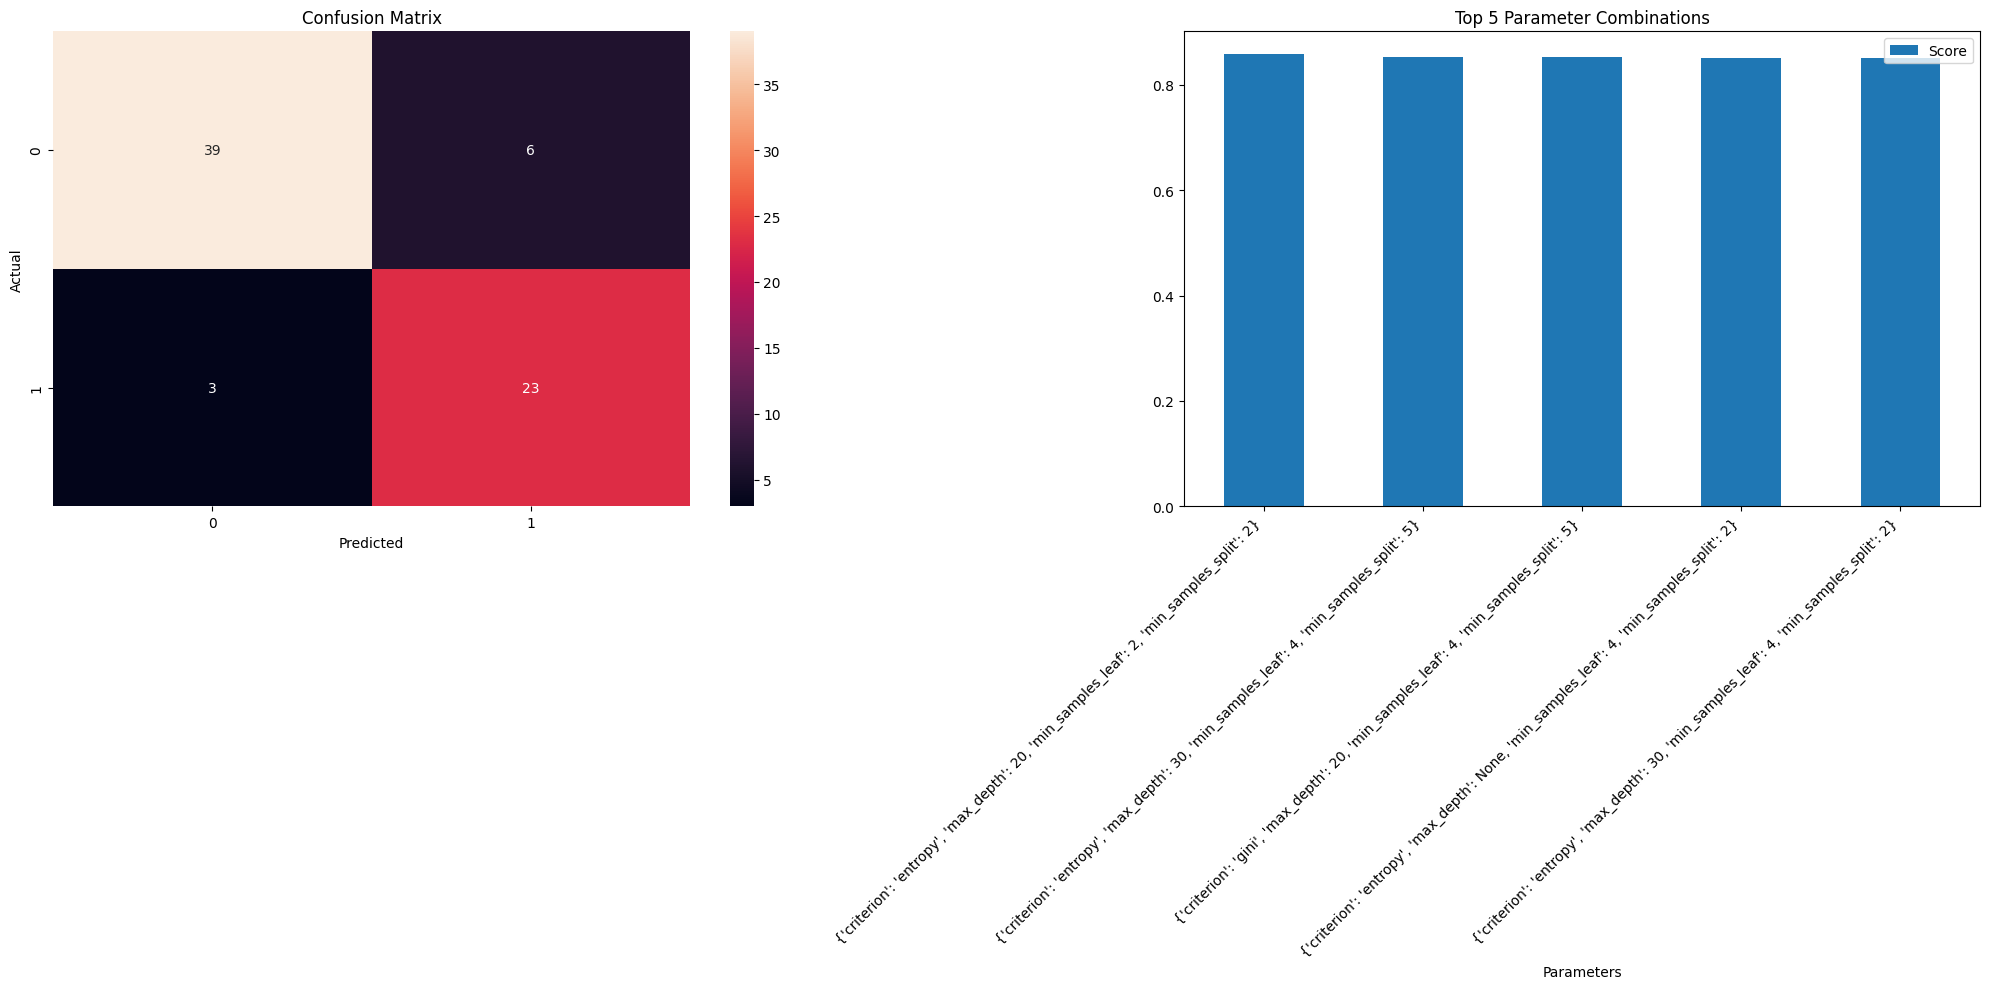

In [14]:
results_dt = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'dt')

print("\nBest Parameters:", results_dt['best_parameters'])
print("\nBest Cross-validation Score:", results_dt['best_score'])
print("\nFeature Importances:", results_dt['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_dt['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [15]:
dt = DecisionTreeClassifier(**results_dt['best_parameters'])

sbs_dt = SequentialBackwardSelection(estimator=dt,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_dt.fit(X_train, X_test, y_train, y_test)


Removed feature: feature4
Current performance: 0.92958
Remaining features: ['feature1', 'feature2', 'feature3', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature5
Current performance: 0.92958
Remaining features: ['feature1', 'feature2', 'feature3', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed featu

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Best Cross-validation Score: 0.8042910137027783

Feature Importances: {'feature1': np.float64(0.6978678688049115), 'feature2': np.float64(0.0), 'feature3': np.float64(0.32581545003036927), 'feature4': np.float64(0.06989271345145256), 'feature5': np.float64(0.3362284400163231), 'feature6': np.float64(0.2726176347923947), 'feature7': np.float64(0.4219673590672693), 'feature8': np.float64(0.4133317818941066), 'feature9': np.float64(0.15746414529251684), 'feature10': np.float64(0.08208237437391389), 'feature11': np.float64(0.0007669117384604546), 'feature12': np.float64(0.03351422410109427), 'feature13': np.float64(0.009622865366949236), 'feature14': np.float64(0.21019679281041637), 'feature15': np.float64(0.142198476943859), 'feature16': np.float64(0.027962767271710355), 'feature17': np.float64(0.146776796637924), 'feature18': np.float64(0.07319235071946653), 'f

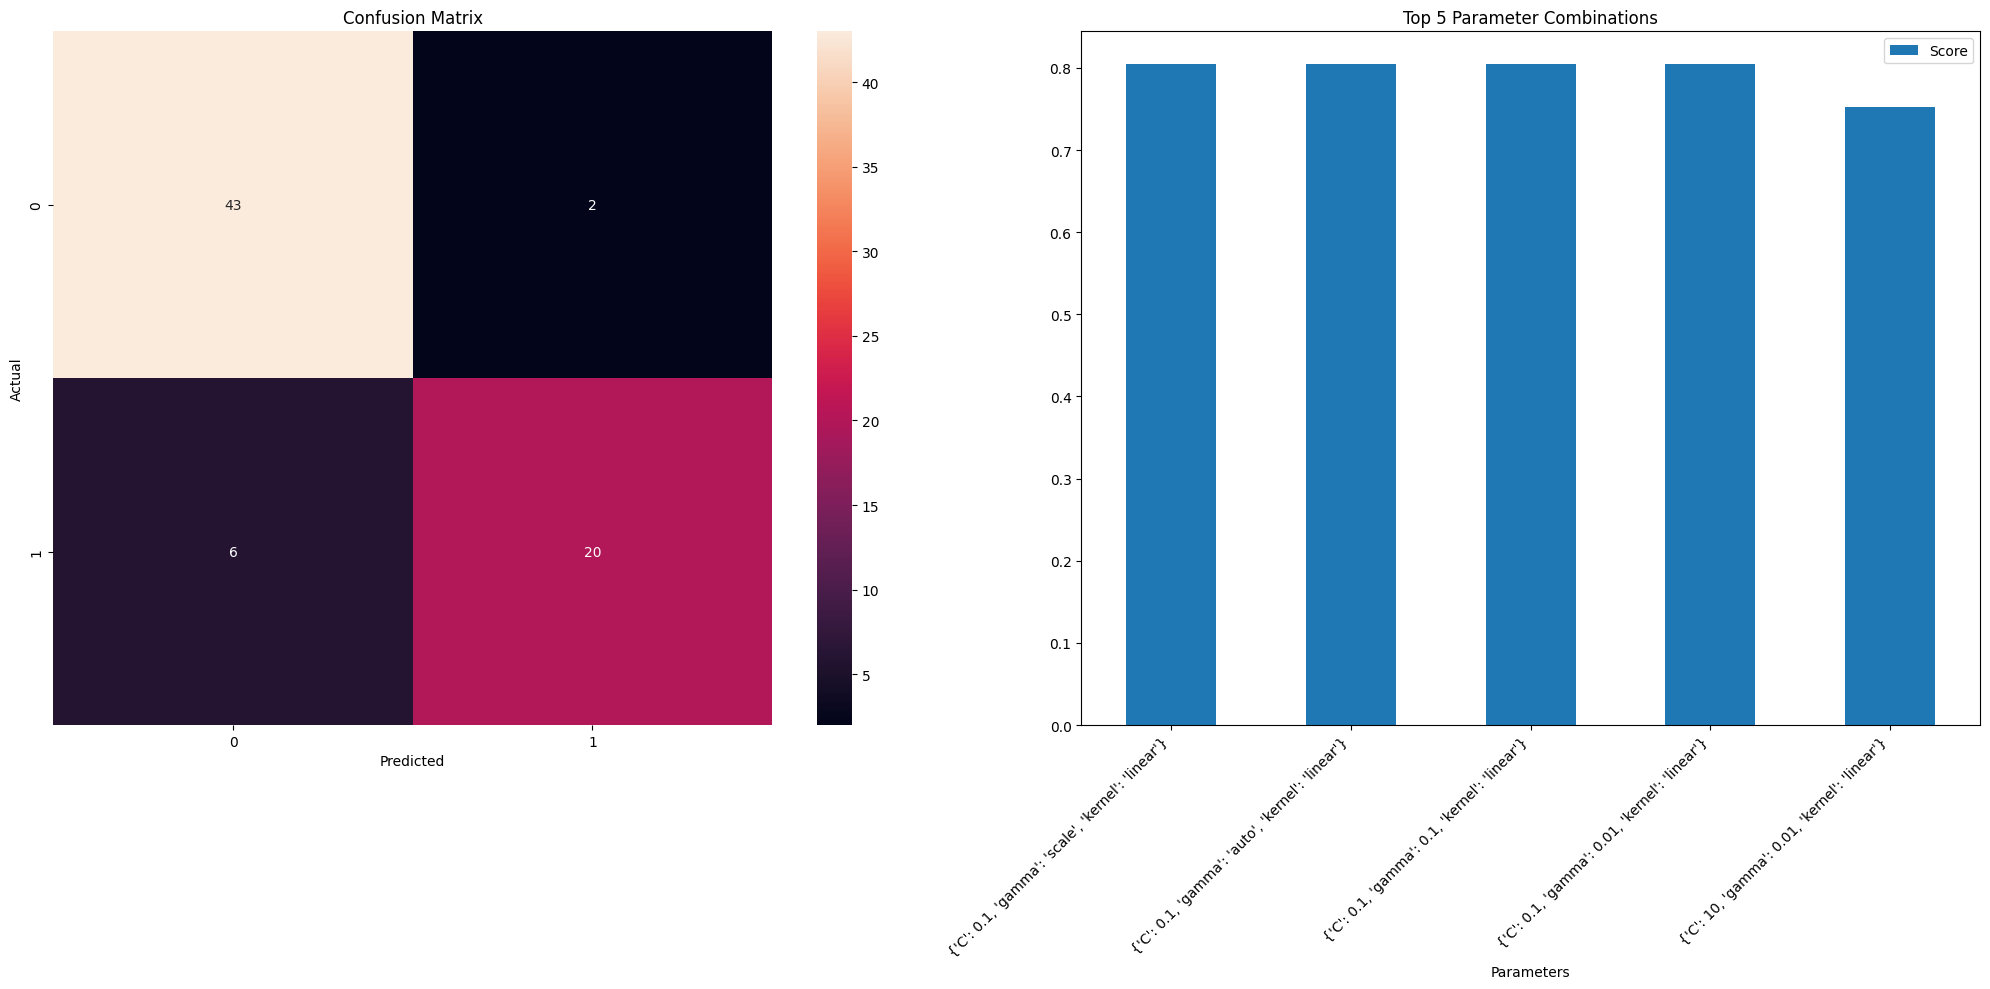

In [16]:
custom_params_svm = {
        'C': [0.1, 1, 10],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto', 0.1, 0.01]
}

results_svm = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'svm', custom_param_grid=custom_params_svm)

print("\nBest Parameters:", results_svm['best_parameters'])
print("\nBest Cross-validation Score:", results_svm['best_score'])
print("\nFeature Importances:", results_svm['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_svm['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [17]:
svm = SVC(**results_svm['best_parameters'])

sbs_svm = SequentialBackwardSelection(estimator=svm,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)


Removed feature: feature2
Current performance: 0.90141
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature4
Current performance: 0.90141
Remaining features: ['feature1', 'feature3', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed featu

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/soulangel443/.local/share/mise/installs/python/latest/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters: {'epochs': 5, 'learning_rate': 1e-05, 'random_state': 20, 'verbose': False}

Best Cross-validation Score: 0.7329759107887186

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        45
           1       0.67      0.69      0.68        26

    accuracy                           0.76        71
   macro avg       0.74      0.75      0.74        71
weighted avg       0.76      0.76      0.76        71



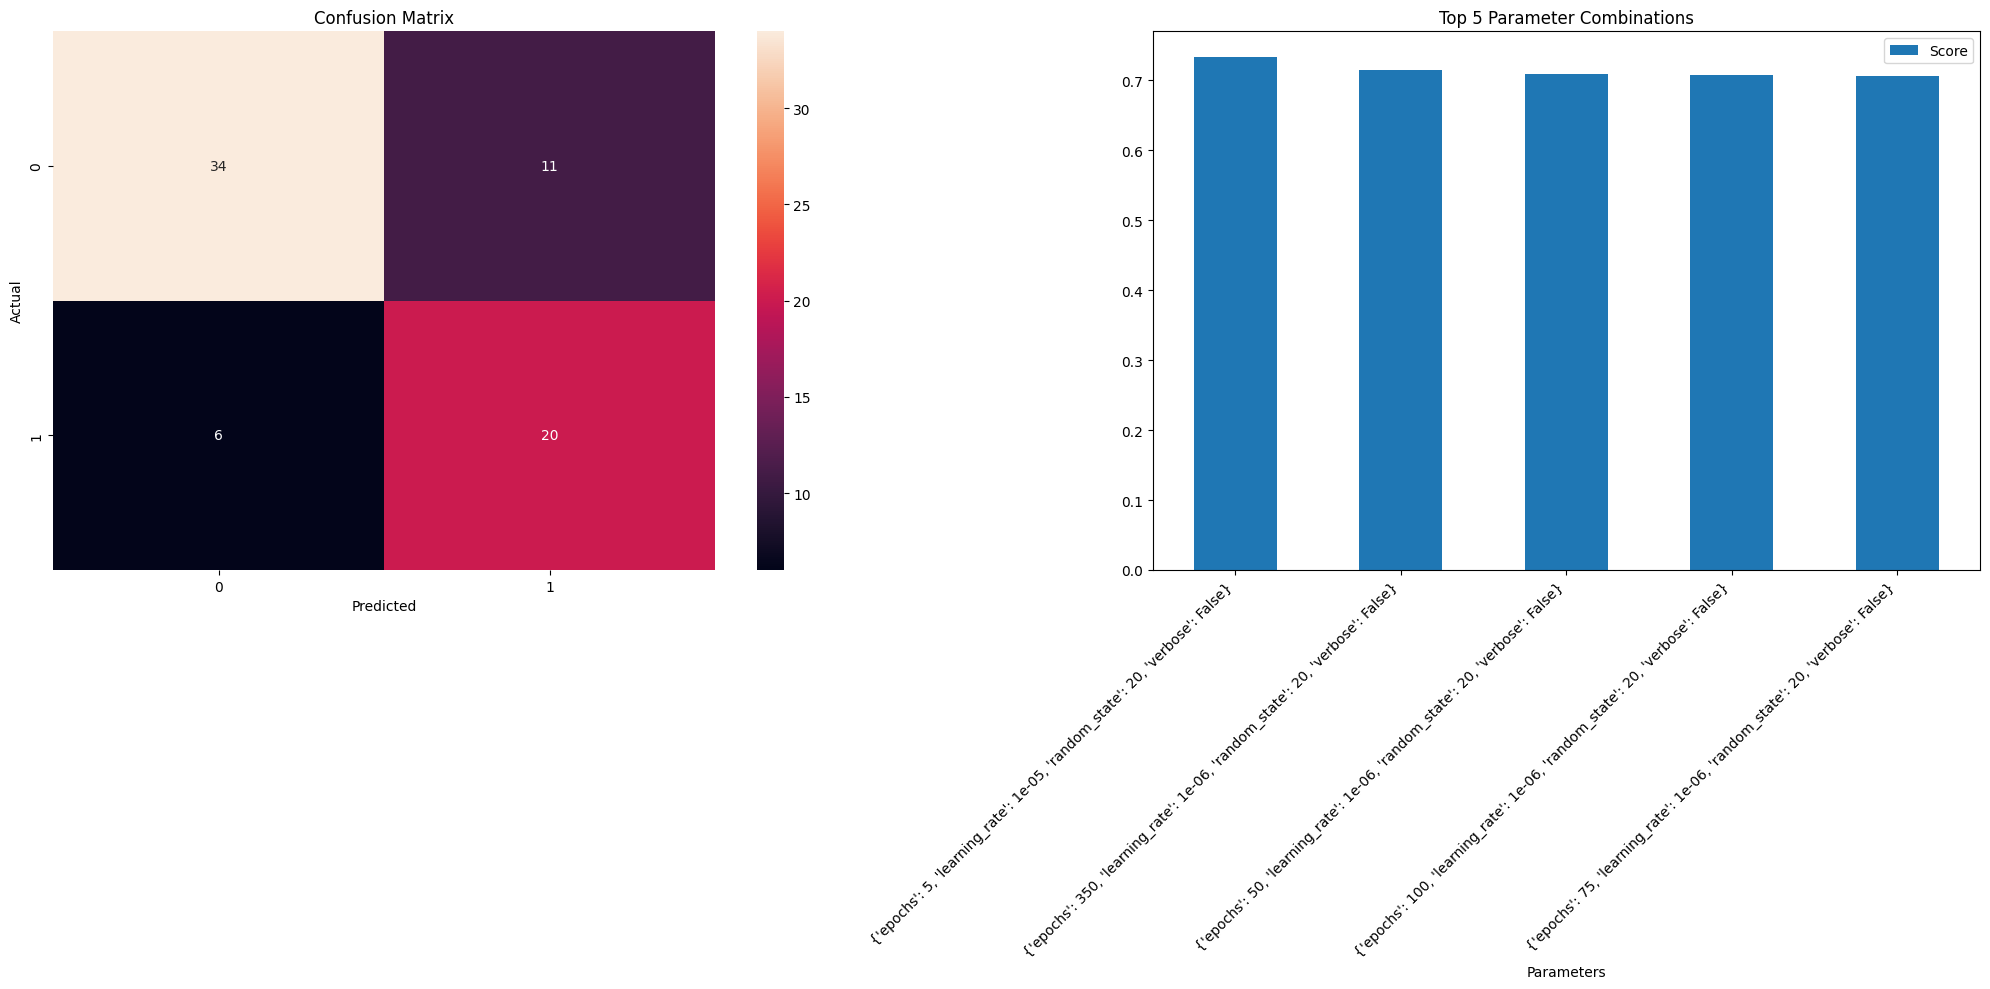

In [18]:
custom_params_mpa = {
  'learning_rate' : [1e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03],
  'epochs': [1, 5, 10, 50, 75, 100, 150, 350],
  'verbose': [False],
  'random_state':[20]
}

results_mpa = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'mpa', custom_param_grid=custom_params_mpa)

print("\nBest Parameters:", results_mpa['best_parameters'])
print("\nBest Cross-validation Score:", results_mpa['best_score'])
print("\nFeature Importances:", results_mpa['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_mpa['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [19]:
mpa_classifier = mpa(**results_mpa['best_parameters'])

sbs_mpa = SequentialBackwardSelection(estimator=mpa_classifier,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_mpa.fit(X_train, X_test, y_train, y_test)


Removed feature: feature21
Current performance: 0.84507
Remaining features: ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature11
Current performance: 0.84507
Remaining features: ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed featur